In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [5]:
from google.colab import files
#upload Animal_photos.zip here or on the side
data_zip = files.upload()

Saving Animal_photos.zip to Animal_photos.zip


In [8]:
#extract zip in browser so photos are accessable
!unzip Animal_photos.zip

Archive:  Animal_photos.zip
   creating: Animal_photos/Cats/
  inflating: Animal_photos/Cats/cat_1_0.jpg  
  inflating: Animal_photos/Cats/cat_1_1.jpg  
  inflating: Animal_photos/Cats/cat_1_10.jpg  
  inflating: Animal_photos/Cats/cat_1_11.jpg  
  inflating: Animal_photos/Cats/cat_1_12.jpg  
  inflating: Animal_photos/Cats/cat_1_13.jpg  
  inflating: Animal_photos/Cats/cat_1_14.jpg  
  inflating: Animal_photos/Cats/cat_1_2.jpg  
  inflating: Animal_photos/Cats/cat_1_3.jpg  
  inflating: Animal_photos/Cats/cat_1_4.jpg  
  inflating: Animal_photos/Cats/cat_1_5.jpg  
  inflating: Animal_photos/Cats/cat_1_6.jpg  
  inflating: Animal_photos/Cats/cat_1_7.jpg  
  inflating: Animal_photos/Cats/cat_1_8.jpg  
  inflating: Animal_photos/Cats/cat_1_9.jpg  
  inflating: Animal_photos/Cats/cat_10_0.jpg  
  inflating: Animal_photos/Cats/cat_10_1.jpg  
  inflating: Animal_photos/Cats/cat_10_10.jpg  
  inflating: Animal_photos/Cats/cat_10_11.jpg  
  inflating: Animal_photos/Cats/cat_10_12.jpg  
  infl

In [21]:
import pathlib
#locate data set phots
data_dir = pathlib.Path("/content/Animal_photos")
#check if done correct, should print out True
data_dir.exists()

True

In [22]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
#Lists total amount of photos, cats and dogs

1873


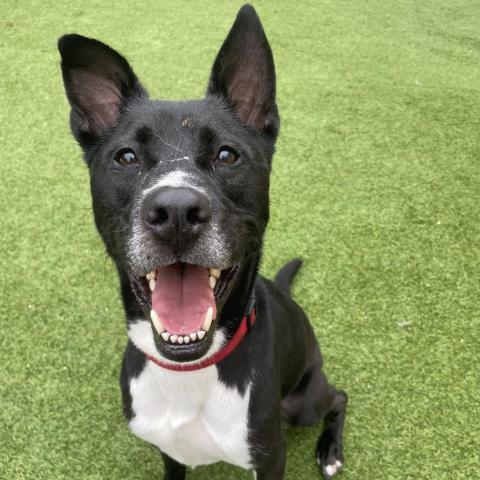

In [25]:
dogs = list(data_dir.glob('Dogs/*'))
PIL.Image.open(str(dogs[1]))

In [26]:
batch_size = 32
img_height = 300
img_width = 300

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1873 files belonging to 2 classes.
Using 1499 files for training.


In [27]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1873 files belonging to 2 classes.
Using 374 files for validation.


In [28]:
class_names = train_ds.class_names
print(class_names)

['Cats', 'Dogs']
